# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | susuman
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | saint-yrieix-la-perche
Processing Record 6 of Set 1 | inhambane
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | bikenibeu village
Processing Record 9 of Set 1 | garachico
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | palikir - national government center
Processing Record 13 of Set 1 | kosh-agach
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | kez
Processing Record 20 of Set 1 | port pirie
Processing Record 21 of Set 1 | college
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,susuman,62.7833,148.1667,-19.81,97,100,0.20,RU,1729541744
1,badger,64.8000,-147.5333,2.14,91,100,1.54,US,1729541745
2,grytviken,-54.2811,-36.5092,2.15,96,100,2.43,GS,1729541746
3,namibe,-15.1961,12.1522,19.91,79,5,1.82,AO,1729541747
4,saint-yrieix-la-perche,45.5160,1.2057,15.03,93,76,1.51,FR,1729541748


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,-19.81,97,100,0.20,RU,1729541744
1,badger,64.8000,-147.5333,2.14,91,100,1.54,US,1729541745
2,grytviken,-54.2811,-36.5092,2.15,96,100,2.43,GS,1729541746
3,namibe,-15.1961,12.1522,19.91,79,5,1.82,AO,1729541747
4,saint-yrieix-la-perche,45.5160,1.2057,15.03,93,76,1.51,FR,1729541748


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

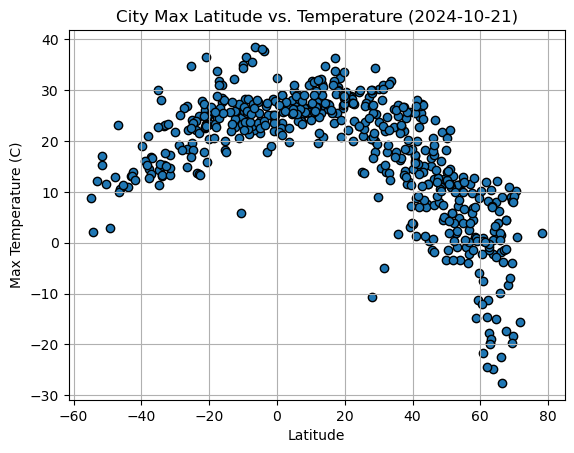

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
# Import datetime
from datetime import date

# Add labels, title, and grid
plt.title(f'City Max Latitude vs. Temperature ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

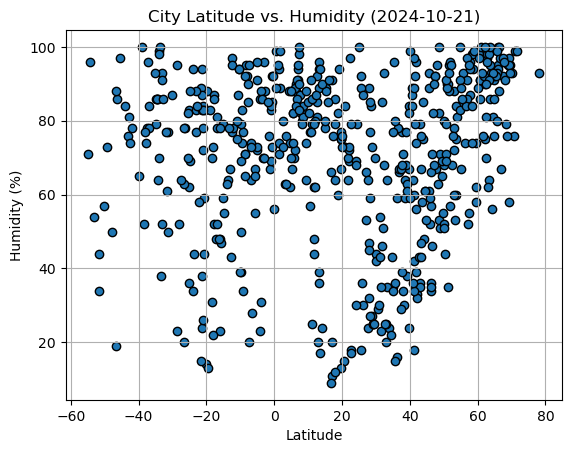

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
# Add labels, title, and grid
plt.title(f'City Latitude vs. Humidity ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

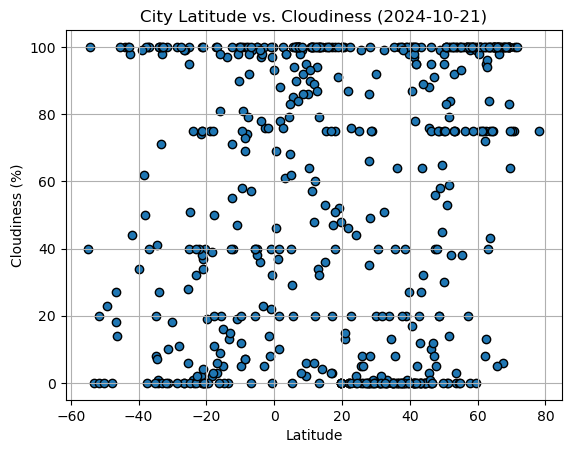

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
# Add labels, title, and grid
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

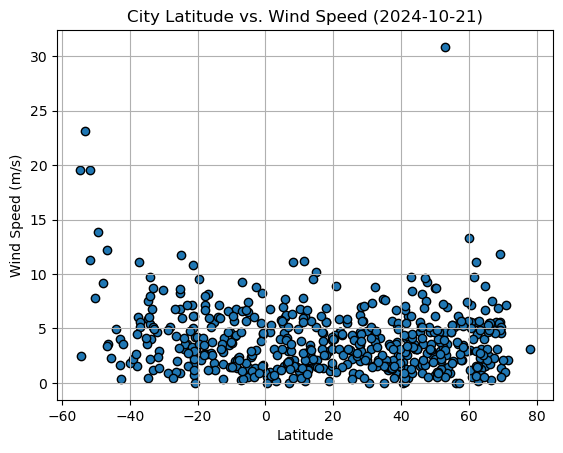

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
# Add labels, title, and grid
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values, title, x_label, y_label):

    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The r^2-value is: {r_value**2}")

    # Plot the data points and the linear regression model
    plt.scatter(x_values, y_values, label='Data Points')
    plt.plot(x_values, x_values * slope + intercept, 'r-', label='Fitted Line')

    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Format the equation string: y = mx + b
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Display the equation on the plot
    plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', fontsize=15, color='red')

    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,-19.81,97,100,0.20,RU,1729541744
1,badger,64.8000,-147.5333,2.14,91,100,1.54,US,1729541745
4,saint-yrieix-la-perche,45.5160,1.2057,15.03,93,76,1.51,FR,1729541748
6,iqaluit,63.7506,-68.5145,-2.15,86,75,3.09,CA,1729541750
7,bikenibeu village,1.3673,173.1241,28.98,74,20,4.63,KI,1729541752


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,2.15,96,100,2.43,GS,1729541746
3,namibe,-15.1961,12.1522,19.91,79,5,1.82,AO,1729541747
5,inhambane,-23.8650,35.3833,22.17,94,1,3.11,MZ,1729541749
9,adamstown,-25.0660,-130.1015,19.65,62,100,6.75,PN,1729541754
10,port-aux-francais,-49.3500,70.2167,2.95,73,23,13.88,TF,1729541755


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6280582781311658


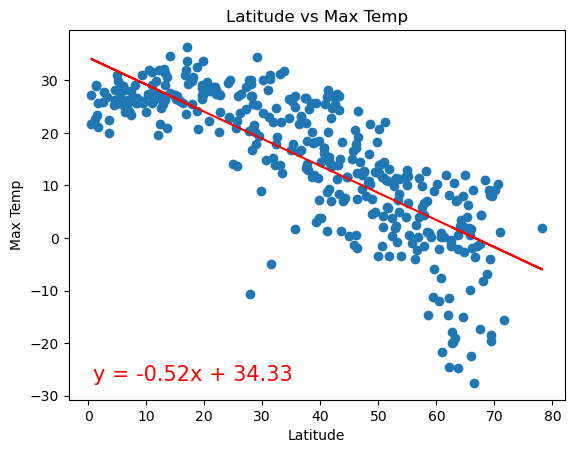

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Latitude vs Max Temp"
x_label = "Latitude"
y_label = "Max Temp"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

The r^2-value is: 0.43357415407820216


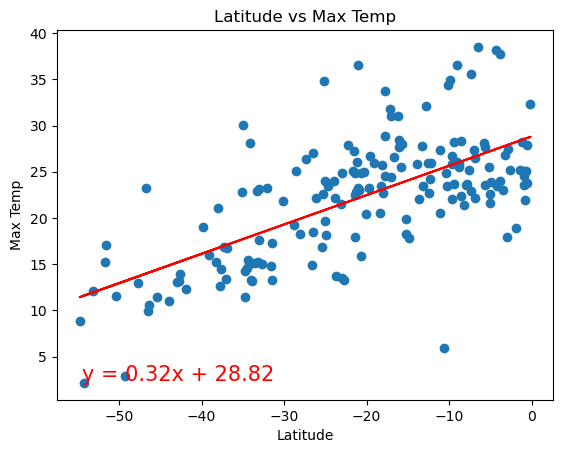

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Latitude vs Max Temp"
x_label = "Latitude"
y_label = "Max Temp"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:**
- Northern Hemisphere: There is a strong correlation between latitude and maximum temperature, indicated by an r^2 value of 0.628. The maximum temperature decreases by 0.52°C per degree of latitude increase in the Northern Hemisphere, indicating the temperature drops as we move further away from the equator.
- Southern Hemisphere: The correlation is weaker compared to the Northern Hemisphere. There is a moderate correlation between latitude and maximum temperature, indicated by an r^2 value of 0.434. In the Southern Hemisphere, the maximum temperature increases by 0.32°C per degree of latitude increase, indicating that temperatures rise as we move towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.03636731535053676


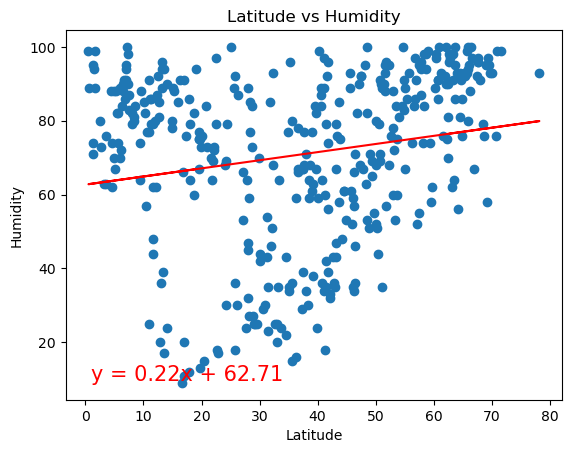

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Latitude vs Humidity"
x_label = "Latitude"
y_label = "Humidity"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

The r^2-value is: 1.4621774917490483e-05


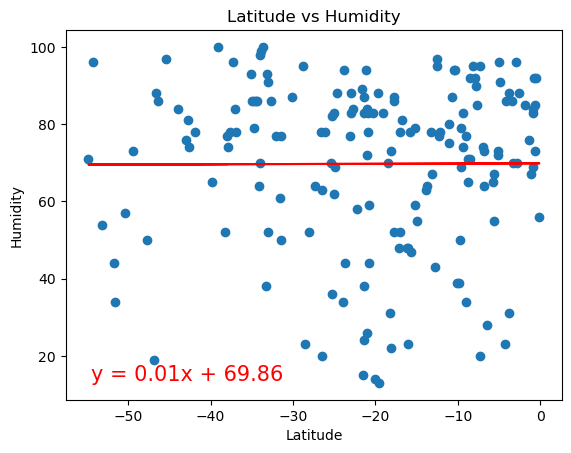

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Latitude vs Humidity"
x_label = "Latitude"
y_label = "Humidity"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** The r^2 values from the linear regressions for the Northern and Southern Hemispheres are 0.0364 and 1.462e-05, respectively, which are very low. This indicates that there is very weak to no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.02068947484012171


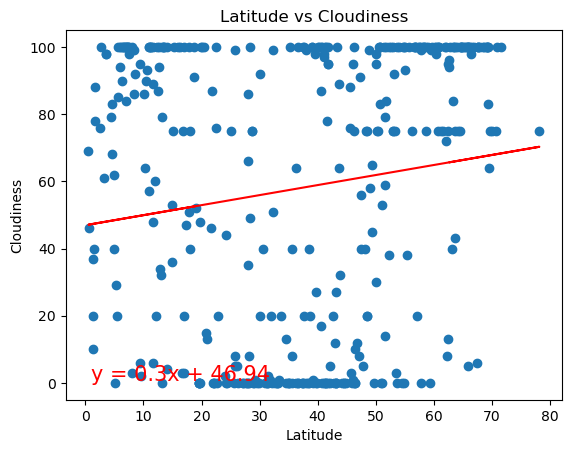

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Latitude vs Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

The r^2-value is: 0.014829140296798077


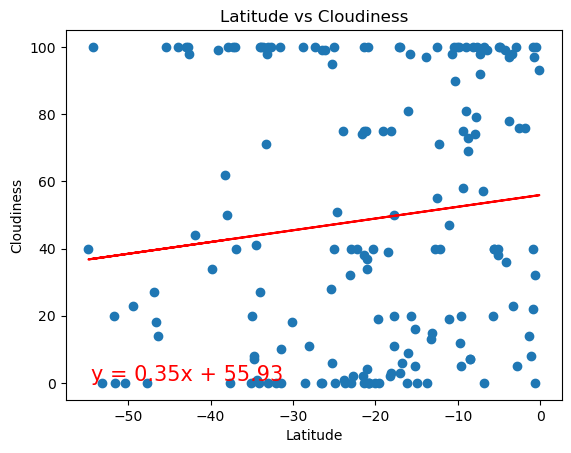

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Latitude vs Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** The r^2 values from the linear regressions for the Northern and Southern Hemispheres are 0.0207 and 0.0148, respectively, which are very low. This indicates that there is very weak to no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.007820935166201153


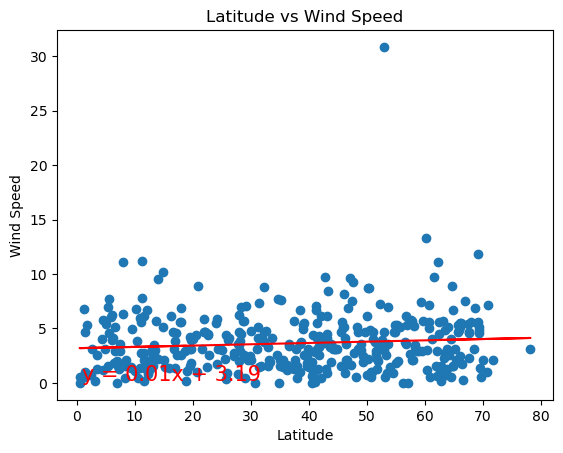

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Latitude vs Wind Speed"
x_label = "Latitude"
y_label = "Wind Speed"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

The r^2-value is: 0.147226918431727


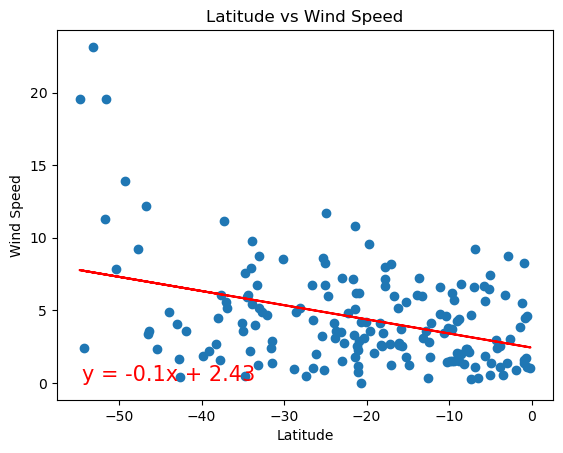

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Latitude vs Wind Speed"
x_label = "Latitude"
y_label = "Wind Speed"
linear_reg_plot(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** The r^2 values from the linear regressions for the Northern and Southern Hemispheres are 0.00782 and 0.147, respectively, which are very low. This indicates that there is very weak to no correlation between latitude and wind speed.